In [2]:
import neuprint_functions
import numpy as np
import json
%load_ext autoreload
%autoreload 2 -p

In [3]:
mbon_id = 424789697 #MBON01_R
types, bodyids = neuprint_functions.get_all_neurons_presynaptic_to(mbon_id, supertype='KC')
soma_loc = neuprint_functions.get_soma_location(mbon_id)

In [4]:
soma_loc

[21581, 29092, 5440]

In [5]:
synapses = neuprint_functions.pull_synapses(bodyids, post_id=mbon_id, n_iter=4)

  0%|          | 0/2324 [00:00<?, ?it/s]

  0%|          | 0/2351 [00:00<?, ?it/s]

  0%|          | 0/2516 [00:00<?, ?it/s]

  0%|          | 0/2622 [00:00<?, ?it/s]

In [6]:
# Factor to adjust from pixels to um coordinates
coordinates, lengths = neuprint_functions.pre_syn_coord_dict(synapses, bodyids)
print("The Total number of PRE>POST synapses is = "+str(len(synapses))) 
print("The total number of presynaptic KCs is = "+str(len(coordinates))) 
print("The average number of KC>MBON synapses per KC is = "+str(np.mean(lengths)))
coordinates_json = json.dumps(coordinates, indent = 4)
with open(f'synapse_coordinates_scaled_{mbon_id}.json', 'w') as output:
    output.write(coordinates_json)
output.close()

The Total number of PRE>POST synapses is = 9813
The total number of presynaptic KCs is = 1193
The average number of KC>MBON synapses per KC is = 8.225481978206203


In [7]:
skel_graph = neuprint_functions.pull_skeleton(mbon_id, skel_format='nx')
skel = neuprint_functions.pull_skeleton(mbon_id, skel_format='pandas')
skel_swc, relabel_dict = neuprint_functions.relabel_skeleton_swc(skel_graph, skel)

In [8]:
with open("neuron_skeleton.swc", "w") as output:
    output.write(skel_swc)

In [9]:
closest_skel_nodes_to_synapses, synapses_per_skel_node_dict = neuprint_functions.match_synapses_to_tree(synapses, skel_graph, relabel_dict)

In [10]:
# Jan 22, 2024
# Fitting passive membrane parameters of MBON-02 through an Optimization algorithm

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
from neuron import h, gui
from scipy.optimize import minimize

--No graphics will be displayed.


In [11]:
v_rest = -55.78571429 
data = pd.read_excel('./data/Recorded_voltage.xlsx')
t_experiment = data.iloc[0, 1:]
v_experiment = data.iloc[2, 1:]
v_experiment = [x * v_rest + v_rest for x in v_experiment]

In [12]:
# Initial guesses for the parameters
initial_guess = [100, 0.7, 9.0E-6]

# Boundaries of the parameters
min_R = 30
max_R = 400
min_C = 0.5
max_C = 1.5
min_g = 1.0E-6
max_g = 1.0E-4
bounds = [(min_R, max_R), (min_C, max_C), (min_g, max_g)]

In [131]:
import networkx as nx
threshold = 2000
dists = np.linalg.norm(skel[["x", "y", "z"]].values - soma_loc, axis=1)
closest_node_to_center = np.argmin(dists)
close_nodes = np.argwhere(dists < threshold) + 1
# Test if graph distance from each node to closest node is less than threshold
close_mask = np.ones(len(skel), dtype=bool)
for n in close_nodes:
    if nx.shortest_path_length(skel_graph, source=closest_node_to_center, target=n) > 2000:
        close_mask[n] = False

array([[33914],
       [33915],
       [33916],
       [33920],
       [33921],
       [33922],
       [33923],
       [33924],
       [33925],
       [33926],
       [33927],
       [33928],
       [33929],
       [33930],
       [33931],
       [33932],
       [33933],
       [33934],
       [33935],
       [33936],
       [33937],
       [33938],
       [33939],
       [33940],
       [33941],
       [33942],
       [33943],
       [33944],
       [33945],
       [33946],
       [33947],
       [33948],
       [33949],
       [33950],
       [33951],
       [33952],
       [33953],
       [33954],
       [33955],
       [33956],
       [33957],
       [33958],
       [33959],
       [33960],
       [33961],
       [33962],
       [33963],
       [33964],
       [33965],
       [33966],
       [33967],
       [33968],
       [33969],
       [33970],
       [33971],
       [33972],
       [33973],
       [33974],
       [33975],
       [33976],
       [33977],
       [33978],
       [

In [127]:
np.linalg.norm(skel[np.isin(skel.index, np.array(nodes_near_soma)-1)][["x", "y", "z"]].values - soma_loc, axis=1)

array([5986.14475268, 5863.26606935, 5745.93847861, 5630.04165171,
       5498.48788305, 5441.93430684, 5321.9746629 , 5224.56974305,
       5144.32201558, 5079.49852929, 4974.15655194, 4845.2914257 ,
       4749.88515651, 4702.40332171, 4540.74982795, 4422.08930551,
       4326.33898348, 4157.85148845, 4018.71733268, 3866.29654838,
       3728.03017692, 3534.12068272, 3428.17283695, 3315.60388958,
       3208.09174918, 3079.0588518 , 3044.34869882, 2937.02042894,
       2893.15090239, 2779.02617186, 2727.50600366, 2645.39801016,
       2531.9022493 , 2476.91118129, 2470.52467048, 2336.87162677,
       2248.96620695, 2092.53172019, 1965.92192114, 1838.08644301,
       1632.1792181 , 1499.30589831, 1359.66221031, 1201.05328774,
       1126.91126536, 1089.07713225, 1022.92326635,  970.92860943,
        874.20879405,  703.93343287,  583.82124035,  517.65607661,
        426.40946392,  402.38928696,  354.20461769,  274.40397466,
        267.55857042,  254.3959476 ,  253.05565583,  239.10039

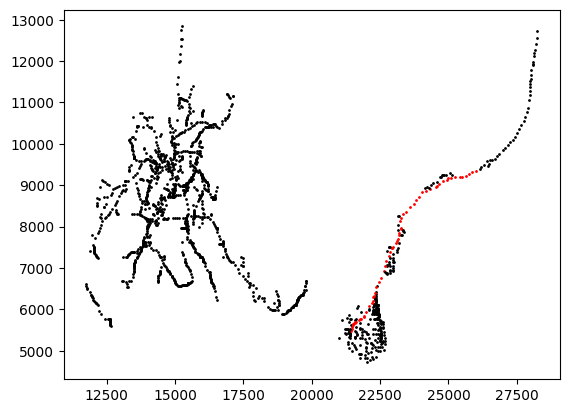

In [129]:
for n in skel_graph.nodes():
    loc = np.array([skel_graph.nodes()[n]['x'], skel_graph.nodes()[n]['y'], skel_graph.nodes()[n]['z']])
    if np.linalg.norm(loc - np.array(soma_loc)) < 10000:
        if n in nodes_near_soma:
            plt.scatter(skel_graph.nodes()[n]['x'], skel_graph.nodes()[n]['z'], c='red', s=1)
        else:    
            plt.scatter(skel_graph.nodes()[n]['x'], skel_graph.nodes()[n]['z'], c='black', s=1)

In [25]:
len(nodes_near_soma)

169

In [15]:
data = pd.read_csv("./data/cell1.csv")

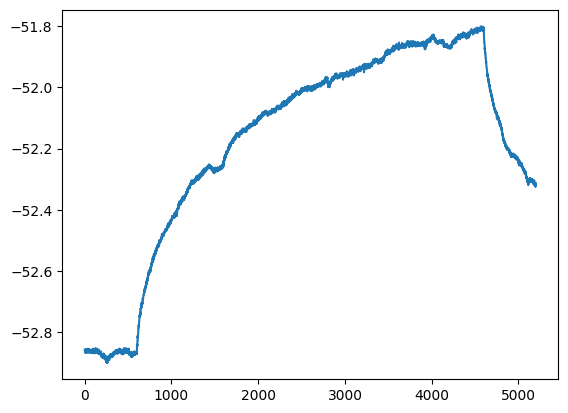

In [29]:
i = 7
t_experiment = data.index
v_experiment = data.iloc[:, i]
# If we print v_experiment, we see that it is normalized between 0 and 1. So we need to rescale it to actual values
v_rest = -55.78571429     # resting membrane voltage
v_experiment = [x * v_rest + v_rest for x in v_experiment]
plt.plot(v_experiment)

In [30]:
# Initial guesses for the parameters
initial_guess = [100, 0.7, 9.0E-6]

# Boundaries of the parameters
min_R = 30
max_R = 400
min_C = 0.5
max_C = 1.5
min_g = 1.0E-6
max_g = 1.0E-4
bounds = [(min_R, max_R), (min_C, max_C), (min_g, max_g)]

In [ ]:



# Function to load morphology data
def instantiate_swc(filename):
    '''
    Load swc file and instantiate it as cell
    Code source: https://www.neuron.yale.edu/phpBB/viewtopic.php?t=3257
    '''

    # load helper library, included with Neuron
    h.load_file('import3d.hoc')

    # load data
    cell = h.Import3d_SWC_read()
    cell.input(filename)

    # instantiate
    i3d = h.Import3d_GUI(cell,0)
    i3d.instantiate(None)



def myinit():
    for sec in all_sections:
        sec.Ra = h.Resist
        sec.cm = h.Capac
        sec.insert('pas')
        for seg in sec:
            seg.pas.g = h.conduct
            seg.pas.e = h.reverse
    h.v_init = -55.79   # Resting membrane potential
    print('initializing')
    if h.cvode.active():
        h.cvode.re_init()
    else:
        h.fcurrent()
    h.frecord_init()
    stim = None


    
all_sections = None
t_vec = None
v_vec_soma = None

# Define the function that calculates the difference between experimental and simulated voltage vectors
def objective(params):
   R, C, g = params

   from neuron import h, gui        # open NEURON environment

   # Import swc and instantiate cell
  # cell = instantiate_swc('MBON-02-right.swc')
   cell = instantiate_swc('MBON-02-200-Janelia-Scaled.swc')

   # Import function automatically creates dendritic and axonal sections, named "dend_0[i]"
   # Create SectionList containing all sections
   arbors = h.SectionList()
   for sec in h.allsec():
       arbors.append(sec=sec)

   # Convert SectionList into a Python list arbors_py
   # Individual sections can be selected by their index i
   arbors_py = [sec for sec in arbors]

   soma_sec = []
   for sec in range(5975, 6144):
     soma_sec.append(sec)

   soma_list = []
   for i in soma_sec:
      soma_list.append('dend_0[{}]'.format(i))

   soma_sections = []
   for sec in arbors_py:
    if str(sec) in soma_list:
       soma_sections.append(sec)

   
   # Create the artificial soma
   for sec in soma_sections:
      h.delete_section(sec=sec)
   # Making new artificial soma
   soma = h.Section(name='soma')
   soma.connect(h.dend_0[5974](1), 0)
   soma.L = 6.243
   soma.diam = 6.243
   soma.nseg = 1
   #help(soma)

   
   # Removing soma sections from arbors_py
   temp = []
   for sec in arbors_py:
    if str(sec) != '<deleted section>':
        temp.append(sec)
   arbors_py = temp

   # Whole neuron morphology
   global all_sections
   all_sections = []
   all_sections.append(soma)
   for sec in arbors_py:
       all_sections.append(sec)

   # Creating the simulated voltage trajectory
   R_var = 'Resist='+str(R)
   C_var = 'Capac='+str(C)
   g_var = 'conduct='+str(g)

   # Simulating soma voltage before fitting passive parameters
   # Proxy values
   h(R_var)
   h(C_var)
   h(g_var)
   h('reverse = -55.79')     # Leak reversal potential (mV)

   # Define new initializing procedure... now for any process that initializes model
   h('proc init() {finitialize(v_init) nrnpython("myinit()")}')

   # Setting the passive parameters
   for sec in all_sections:
       sec.Ra = h.Resist          # Cytoplasmic Resistivity (Ohm * cm)
       sec.cm = h.Capac         # Membrane Capacitance (micro Farads / cm2)
       sec.insert('pas')                   # Insert passive channels
       for seg in sec:
           seg.pas.g = h.conduct       # Passive conductance (S/cm2)
           seg.pas.e = h.reverse                       # Leak reversal potential (mV)
   h.v_init = -55.79   # Resting membrane potential
   h.t = 0

   # Create current injection at soma
   stim = h.IClamp(soma(0.5))
   stim.delay = 30           # Start time of current injection (ms)
   stim.dur = 400            # Duration (ms)
   stim.amp = -0.01          # Amplitude (nA)

   # Recording simulation results
   # time
   global t_vec
   t_vec = h.Vector()
   t_vec.record(h._ref_t)

   # Soma voltage
   global v_vec_soma
   v_vec_soma = h.Vector()
   v_vec_soma.record(soma(0.5)._ref_v)

   # Create recording vector for current
   inject = h.Vector()
   inject.record(stim._ref_i)

   h.t = 0.0
   h.tstop = 460       # Same as experimental recording duration
   h.run()

   # Build a vector out of v_vec_soma whoes length is equal to the length of v_experiment
   v_sim_adjust = []
   for i in range(len(v_vec_soma)):
    if i % 2 !=0:
       v_sim_adjust.append(v_vec_soma[i])

   v_sim_adjust = np.array(v_sim_adjust)

   # Calculate the sum of squared differences
   diff = v_experiment - v_sim_adjust
   #h.quit()       # exit the NEURON environment
   return np.sum(diff**2)
   h.quit()       # exit from NEURON environment             # The fun attribute of the optimization result (result.fun) will have the value of this objective function at the optimized point


# Perform optimization
result = minimize(objective, initial_guess, bounds=bounds)
optimized_error = math.sqrt(result.fun/len(v_experiment)) / abs(max(v_experiment)-min(v_experiment))

# Extract optimized values
optimized_R, optimized_C, optimized_g = result.x

# Extract the error (objective value)
optimized_error = math.sqrt(result.fun/len(v_experiment)) / abs(max(v_experiment)-min(v_experiment))

# Print the optimized values and error
print("Optimized R:", optimized_R)
print("Optimized C:", optimized_C)
print("Optimized g:", optimized_g)
print("Optimized Error:", optimized_error)



# It looks like repeating the optimization with different initial conditions leads to the same optimized value for parameters.
# So we consider this as the best fit.


# Plotting the simulated variables
plt.style.use('fivethirtyeight')
plt.figure(2)
plt.rcParams.update({'font.size': 15})
color = 'black'
plt.plot(t_experiment, v_experiment, color=color, linewidth=3, label='experiment')
color = '#22B822'     # forest green
plt.plot(t_vec, v_vec_soma, color=color, linewidth=3, label='simulation')
plt.title('I-clamp, after optimization')
plt.xlabel('t [ms]')
plt.ylabel('v_s [mV]')
plt.legend()
plt.tight_layout()
plt.savefig('I-clamp_10pA_after_optimization.jpg')
plt.show()



with open('Fitted_parameters_MBON-02_Hemibrain.txt', 'w') as file:
   file.write("Optimized values of passive membrane parameters: \n")
   file.write('initial_guess = ' + str(initial_guess) +"\n")
   file.write('Optimized R = ' + str(optimized_R) +"\n")
   file.write('Optimized C = ' + str(optimized_C) + "\n")
   file.write('Optimized g = '+ str(optimized_g) + "\n")
   file.write('Optimization error = ' + str(optimized_error) + "\n")
# The file is automatically closed when the 'with' block is exited
   
   